In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Visualization').getOrCreate()
spark

In [3]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType,DoubleType, DateType
from datetime import date
schema = StructType([
StructField("order_id", StringType()),
StructField("region", StringType()),
StructField("category", StringType()),
StructField("quantity", IntegerType()),
StructField("price", DoubleType()),
StructField("order_date", DateType())
])
data = [
("O001", "South", "Electronics", 3, 15000.0, date(2025, 1, 5)),
("O002", "North", "Clothing", 5, 2000.0, date(2025, 1, 6)),
("O003", "East", "Furniture", 2, 12000.0, date(2025, 1, 7)),
("O004", "West", "Electronics", 1, 18000.0, date(2025, 1, 8)),
("O005", "North", "Furniture", 4, 9000.0, date(2025, 1, 10)),
("O006", "South", "Clothing", 6, 2500.0, date(2025, 1, 11)),
("O007", "East", "Electronics", 2, 17000.0, date(2025, 1, 12)),
("O008", "South", "Furniture", 5, 8500.0, date(2025, 1, 15)),
("O009", "West", "Clothing", 7, 3000.0, date(2025, 1, 17)),
("O010", "North", "Electronics", 4, 16000.0, date(2025, 1, 18))
]


# Load the dataset into a PySpark DataFrame and display the first 10 rows

df = spark.createDataFrame(data, schema)
df.show()

+--------+------+-----------+--------+-------+----------+
|order_id|region|   category|quantity|  price|order_date|
+--------+------+-----------+--------+-------+----------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|
|    O010| North|Electronics|       4|16000.0|2025-01-18|
+--------+------+-----------+--------+-------+----------+



In [4]:
# Create a new column revenue = quantity × price

from pyspark.sql.functions import col

df = df.withColumn("revenue", col('quantity') * col('price'))
df.show()

+--------+------+-----------+--------+-------+----------+-------+
|order_id|region|   category|quantity|  price|order_date|revenue|
+--------+------+-----------+--------+-------+----------+-------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|45000.0|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|10000.0|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|24000.0|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|18000.0|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|36000.0|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|15000.0|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|34000.0|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|42500.0|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|21000.0|
|    O010| North|Electronics|       4|16000.0|2025-01-18|64000.0|
+--------+------+-----------+--------+-------+----------+-------+



+-----------+------------+
|   category|sum(revenue)|
+-----------+------------+
|Electronics|    161000.0|
|   Clothing|     46000.0|
|  Furniture|    102500.0|
+-----------+------------+



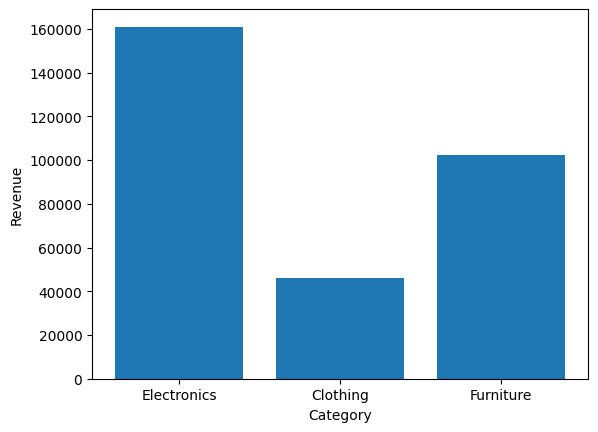

In [5]:
# Generate a bar chart showing total revenue by category
import pandas as pd
import matplotlib.pyplot as plt

df_cat = df.groupBy("category").sum("revenue").alias("total_revenue")
df_cat.show()

# Converting pyspark df to pandas df for plotting
pdf_cat = df_cat.toPandas()

# Plotting bar chart
plt.bar(pdf_cat['category'], pdf_cat['sum(revenue)'])
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

+--------+------+-----------+--------+-------+----------+-------+
|order_id|region|   category|quantity|  price|order_date|revenue|
+--------+------+-----------+--------+-------+----------+-------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|45000.0|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|10000.0|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|24000.0|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|18000.0|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|36000.0|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|15000.0|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|34000.0|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|42500.0|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|21000.0|
|    O010| North|Electronics|       4|16000.0|2025-01-18|64000.0|
+--------+------+-----------+--------+-------+----------+-------+



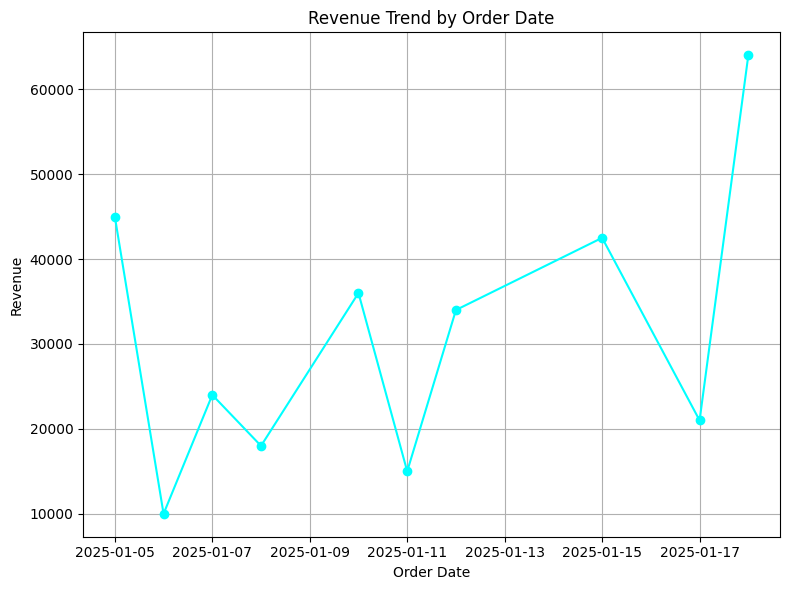

In [6]:
# Create a line chart showing revenue trend by order_date (sorted by date)

df_dt = df.orderBy('order_date')
df_dt.show()

# Converting into pandas dataframe
pdf_dt = df_dt.toPandas()

# Creating line chart showing revenue trend by order_date
plt.figure(figsize=(8,6))
plt.plot(pdf_dt['order_date'], pdf_dt['revenue'], marker='o', color='cyan')
plt.title("Revenue Trend by Order Date")
plt.xlabel("Order Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

+------+------------+
|region|sum(revenue)|
+------+------------+
| South|    102500.0|
|  East|     58000.0|
|  West|     39000.0|
| North|    110000.0|
+------+------------+



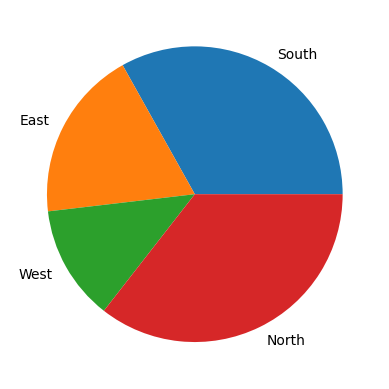

In [7]:
# Create a pie chart showing percentage contribution of each region to total revenue.

df_region = df.groupBy('region').sum('revenue').alias("total_revenue")
df_region.show()

# Converting to pandas
pdf_region = df_region.toPandas()

# Pie chart
plt.pie(pdf_region['sum(revenue)'], labels=pdf_region['region'])
plt.show()

In [17]:

type(df_region)
type(df_dt)
type(df_cat)

pyspark.sql.dataframe.DataFrame

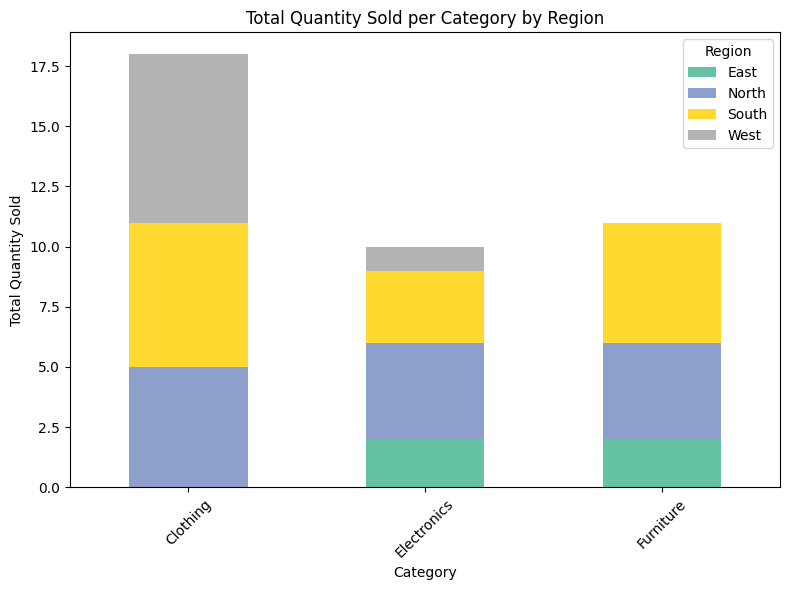

In [8]:
# Create a stacked bar chart comparing total quantity sold per category by region.

from pyspark.sql.functions import sum as _sum
import matplotlib.pyplot as plt

# Aggregate quantity by category and region
df_qty = df.groupBy("category", "region") .agg(_sum("quantity").alias("total_quantity"))

# Convert to Pandas
pdf_qty = df_qty.toPandas()

pivot_df = pdf_qty.pivot(index="category", columns="region", values="total_quantity").fillna(0)

pivot_df.plot(kind="bar", stacked=True, figsize=(8,6), colormap="Set2")

# Stacked bar chart
plt.title("Total Quantity Sold per Category by Region")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



+-----------+------------+
|   category|sum(revenue)|
+-----------+------------+
|Electronics|    161000.0|
|  Furniture|    102500.0|
|   Clothing|     46000.0|
+-----------+------------+



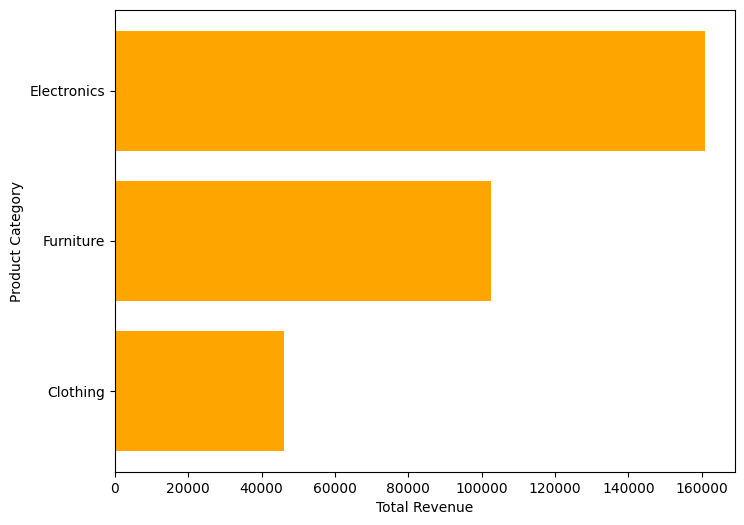

In [9]:
# Filter and visualize only top 5 products by total revenue in a horizontal bar chart

#df_cat.show()

df_top = df_cat.orderBy(col('sum(revenue)').desc())
df_top.show()

# Converting into pandas df
pdf_top = df_top.toPandas()

# Plotting horizontal bar chart
plt.figure(figsize=(8,6))
plt.barh(pdf_top['category'], pdf_top['sum(revenue)'], color='orange')
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.gca().invert_yaxis()
plt.show()

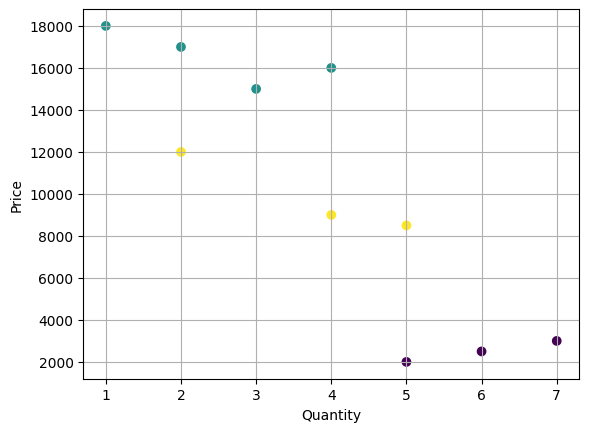

In [10]:
# Create a scatter plot showing quantity vs price colored by category

pdf = df.select("quantity", "price", "category").toPandas()

plt.scatter(pdf['quantity'], pdf['price'], c=pdf['category'].astype('category').cat.codes)
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.grid(True)
plt.show()

+------+-----------+
|region|avg_revenue|
+------+-----------+
| South|   34166.67|
|  East|    29000.0|
|  West|    19500.0|
| North|   36666.67|
+------+-----------+



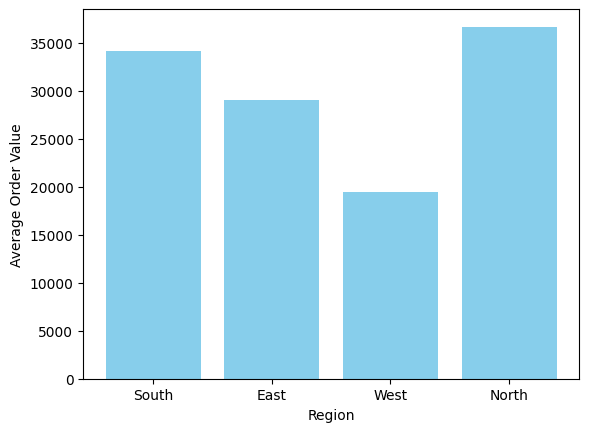

In [11]:
# Find average order value by region and plot it as a bar chart
from pyspark.sql.functions import avg, round

df_avg = df.groupBy('region').agg(round(avg('revenue'),2).alias('avg_revenue'))
df_avg.show()

# Converting it into pandas
pdf_avg = df_avg.toPandas()

# Plotting
plt.bar(pdf_avg['region'], pdf_avg['avg_revenue'], color='skyblue')
plt.xlabel("Region")
plt.ylabel("Average Order Value")
plt.show()


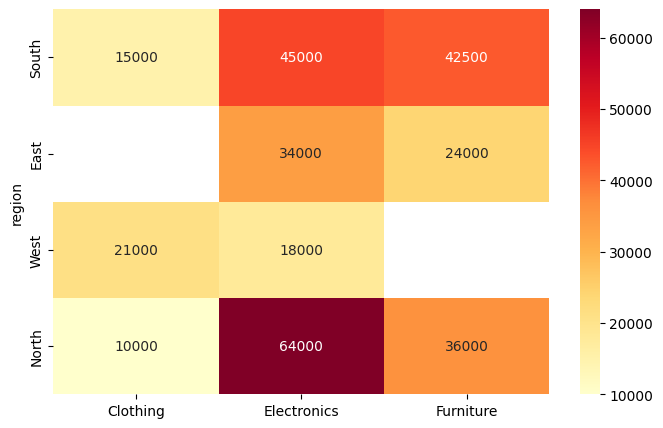

In [14]:
# Create a heatmap (pivot table in Databricks) showing revenue by region and category

import seaborn as sns

df_pivot = df.groupBy('region').pivot('category').agg(_sum('revenue').alias('total_revenue'))

pdf_pivot = df_pivot.toPandas()
pdf_pivot.set_index('region',inplace=True)

plt.figure(figsize=(8,5))
sns.heatmap(pdf_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.show()


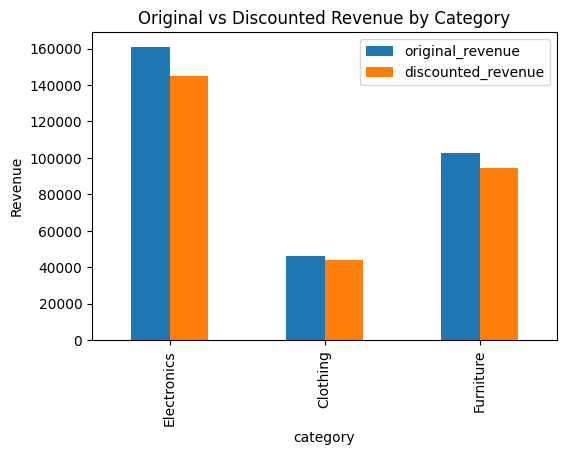

In [17]:
# Apply discount percentage

from pyspark.sql.functions import when
df_discount = df.withColumn("discount", when(col('category') == 'Electronics', 0.10)
                            .when(col('category') == 'Clothing', 0.05)
                            .when(col('category') == 'Furniture', 0.08)
                            .otherwise(0))

# Calculate final discounted revenue
df_discount = df_discount.withColumn(
    "discounted_revenue",
    col('revenue') * (1 - col('discount'))
)

# Aggregate revenues
df_agg = df_discount.groupBy('category').agg(
    _sum('revenue').alias('original_revenue'),
    _sum('discounted_revenue').alias('discounted_revenue')
)

# Convert to pandas DataFrame
pdf_agg = df_agg.toPandas()

# Plot grouped bar chart
pdf_agg.plot(x="category", kind="bar", figsize=(6, 4))
plt.title("Original vs Discounted Revenue by Category")
plt.ylabel("Revenue")

plt.show()
